<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [5]:
df.columns 

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

reformating columns names (more convinient for working)

In [6]:
df.rename(columns={'FlightNumber':'Flight_Number','BoosterVersion':'Booster_Version', 'PayloadMass': 'Payload_Mass', 'ReusedCount':'Reused_Count', 'LandingPad':'Landing_Pad', 'LaunchSite':'Launch_Site', 'Class':'cls'}, inplace=True)

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['flight_number', 'date', 'booster_version', 'payload_mass', 'orbit',
       'launch_site', 'outcome', 'flights', 'gridfins', 'reused', 'legs',
       'landing_pad', 'block', 'reused_count', 'serial', 'longitude',
       'latitude', 'cls'],
      dtype='object')

****

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


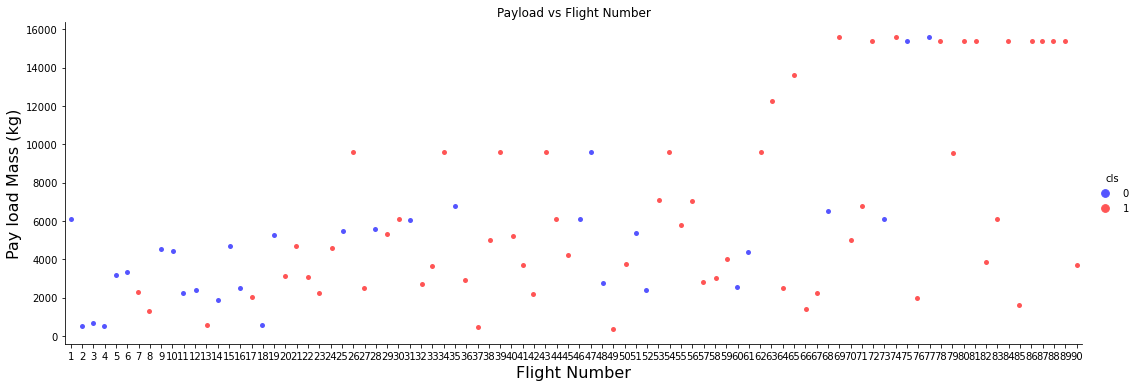

In [8]:
sns.catplot(y="payload_mass", x="flight_number", hue="cls", data=df, aspect = 3, palette='seismic')
plt.xlabel("Flight Number",fontsize=16)
plt.ylabel("Pay load Mass (kg)",fontsize=16)
plt.title('Payload vs Flight Number', fontsize = 12)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


****

### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


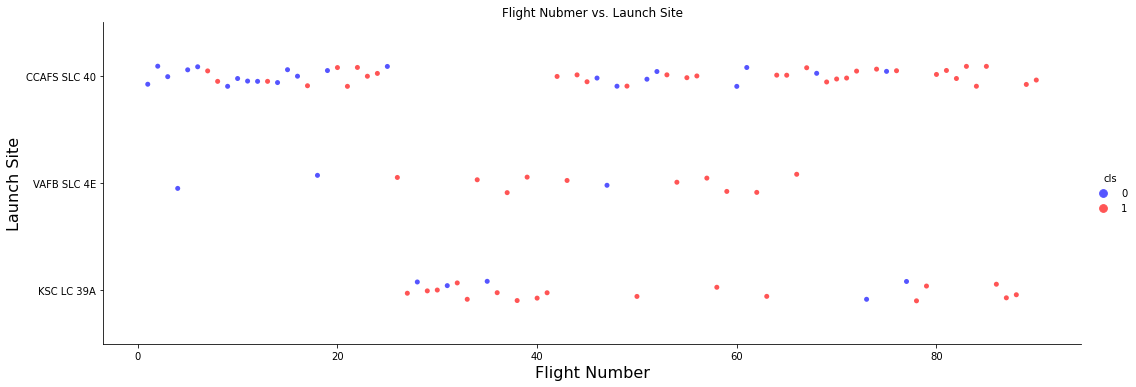

In [13]:
sns.catplot(y='launch_site', x="flight_number", hue="cls", data=df, aspect = 3, palette='seismic' )
plt.xlabel("Flight Number",fontsize=16)
plt.ylabel("Launch Site",fontsize=16)
plt.title('Flight Nubmer vs. Launch Site', fontsize = 12)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


****

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


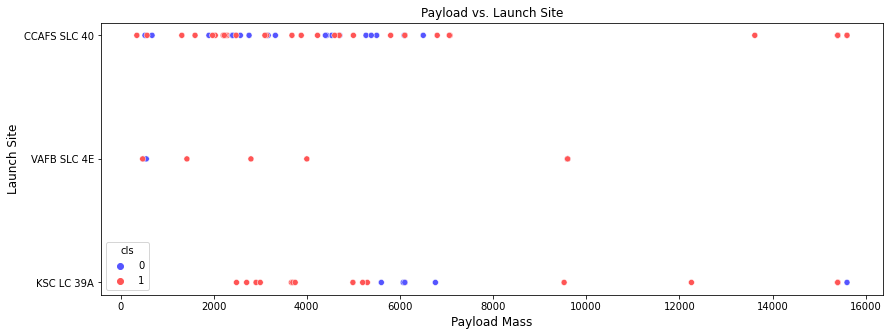

In [62]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x= 'payload_mass', y="launch_site", hue="cls", data=df, palette='seismic' )
plt.xlabel("Payload Mass",fontsize=12)
plt.ylabel("Launch Site",fontsize=12)
plt.title('Payload vs. Launch Site', fontsize = 14)
plt.show()

Now try to explain any patterns you found in the Payload Vs. Launch Site scatter point chart.


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [41]:
temp = df.groupby('orbit').mean('cls')

Text(0.5, 1.0, 'Orbit vs. Success Rate')

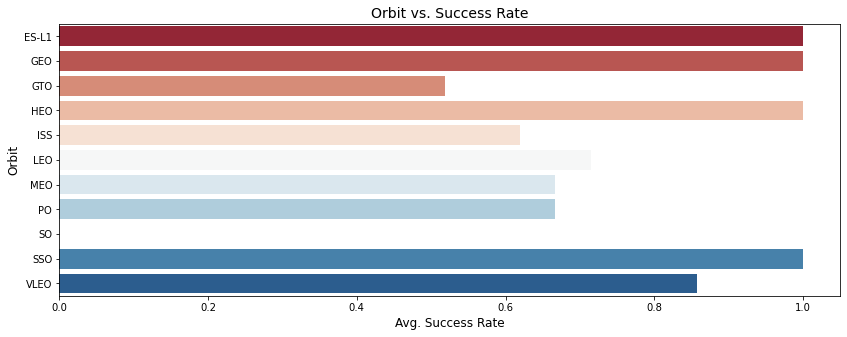

In [60]:
plt.figure(figsize=(14, 5 ))
sns.barplot(temp.cls, temp.index, palette='RdBu' )
plt.xlabel("Avg. Success Rate",fontsize=12)
plt.ylabel("Orbit",fontsize=12)
plt.title('Orbit vs. Success Rate', fontsize = 14)

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


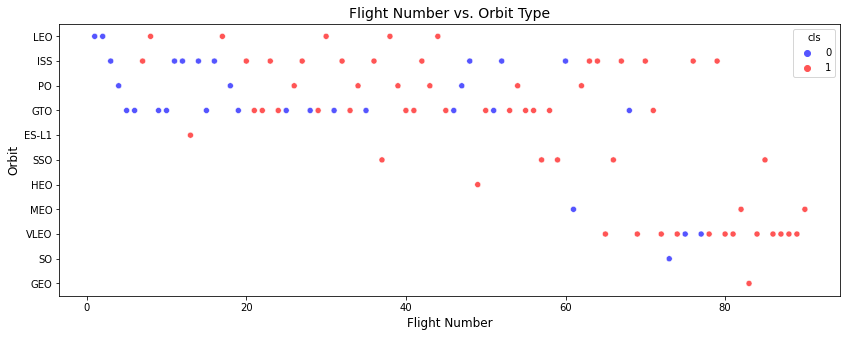

In [68]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x ='flight_number', y ='orbit', hue='cls', data=df, palette='seismic' )
plt.xlabel('Flight Number',fontsize=12)
plt.ylabel("Orbit",fontsize=12)
plt.title('Flight Number vs. Orbit Type', fontsize = 14)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


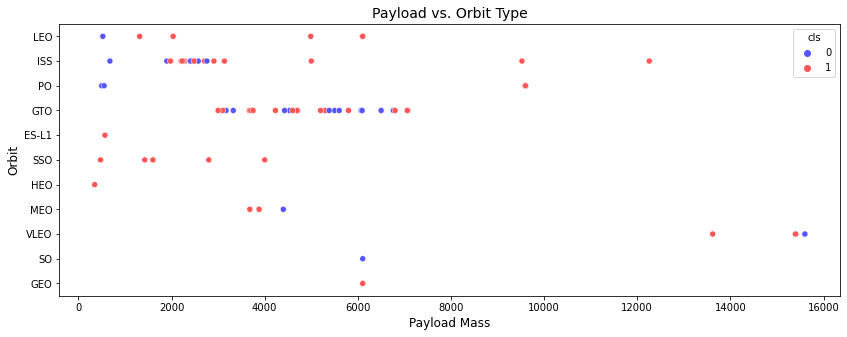

In [70]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x ='payload_mass', y ='orbit', hue='cls', data=df, palette='seismic')
plt.xlabel("Payload Mass",fontsize=12)
plt.ylabel("Orbit",fontsize=12)
plt.title('Payload vs. Orbit Type', fontsize = 14)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


I delete "The function will help you get the year from the date":)
datetime conversion is more convinient and elegant solution than provided "Extract_year" function

In [93]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])

easier way to get 'avarage succses'rate over years: 

In [112]:
df['year'] = df.date.dt.year
temp = df.groupby(df.year).mean('cls')
temp.cls

year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: cls, dtype: float64

In [271]:
temp

,flight_number,payload_mass,flights,gridfins,reused,legs,block,reused_count,longitude,latitude,cls
year,,,,,,,,,,,
2010,1.0,6104.959412,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-80.577366,28.561857,0.000000
2012,2.0,525.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-80.577366,28.561857,0.000000
2013,4.0,1449.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-93.921854,30.585269,0.000000
2014,8.5,3019.333333,1.000000,0.000000,0.000000,0.333333,1.000000,0.000000,-80.577366,28.561857,0.333333
2015,14.5,2346.833333,1.000000,0.833333,0.000000,0.833333,1.000000,0.000000,-80.577366,28.561857,0.333333
2016,21.5,3639.125000,1.000000,1.000000,0.000000,1.000000,1.875000,0.375000,-85.581549,29.320637,0.625000
2017,34.5,5365.719967,1.277778,0.833333,0.277778,0.777778,3.166667,0.777778,-91.715499,30.278835,0.833333
2018,52.5,4832.767190,1.555556,0.833333,0.500000,0.833333,4.500000,1.833333,-89.476646,29.915932,0.611111
2019,66.5,7551.370000,2.200000,0.900000,0.700000,0.900000,5.000000,3.800000,-88.586718,29.780524,0.900000


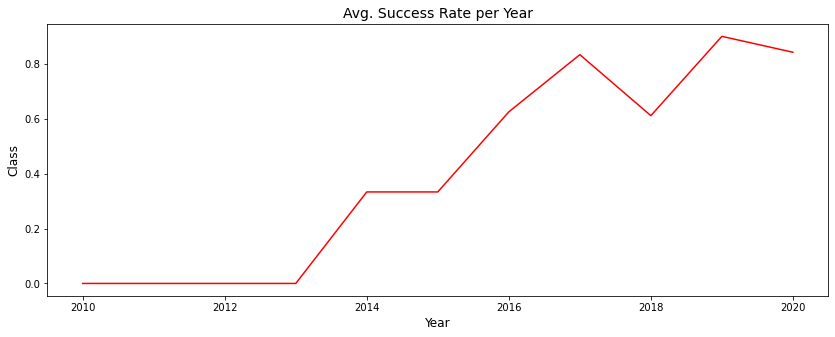

In [274]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize=(14, 5))
sns.lineplot(x = temp.index, y = temp.cls , color = 'r' )
plt.xlabel("Year",fontsize=12)
plt.ylabel("Class",fontsize=12)
plt.title('Avg. Success Rate per Year', fontsize = 14)
plt.show()

Text(0.5, 1.0, 'Flight Success Progress ')

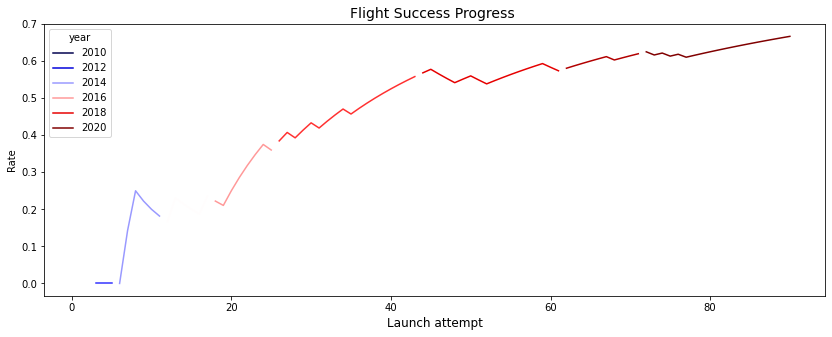

In [264]:
cls_trend = []
c = 0
for f in range(len(df)):   
    c = (a + df.cls[f]) 
    cls_trend.append(c / df.flight_number[f])

plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x = df.flight_number, y = df.trend, hue='year', palette='seismic')   
plt.xlabel("Launch attempt",fontsize=12)
plt.ylabel("Rate",fontsize=10)
plt.title('Flight Success Progress ', fontsize = 14)    

    
    

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [276]:
features = df[['flight_number', 'payload_mass', 'orbit','launch_site', 'flights', 'gridfins', 'reused', 'legs','landing_pad', 'block', 'reused_count', 'serial']]

In [279]:
features.columns = features.columns.str.title()
features.head()

,Flight_Number,Payload_Mass,Orbit,Launch_Site,Flights,Gridfins,Reused,Legs,Landing_Pad,Block,Reused_Count,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


****

PPT_task: unique Launch Site information             /  this task was done in SQL part

In [22]:
print(df.launch_site.value_counts())

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: launch_site, dtype: int64


****

PPT_task: Launch Site begin 'CCA'  / this task was done in SQL part

In [34]:
df[df.launch_site.str.startswith('CCA')][['flight_number','date','launch_site']].head() 

SyntaxError: invalid syntax (<ipython-input-34-7a054af26a46>, line 1)

****

PPT_task: Total Payload Mas (by boosters from NASA)   / SQL part

In [33]:
df.head()

,flight_number,date,booster_version,payload_mass,orbit,launch_site,outcome,flights,gridfins,reused,legs,landing_pad,block,reused_count,serial,longitude,latitude,cls
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [293]:
features_hot = pd.get_dummies(features[['Orbit', 'Launch_Site','Landing_Pad','Serial']])
print(features_hot.columns)
features_hot.head()


Index(['Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'Launch_Site_CCAFS SLC 40', 'Launch_Site_KSC LC 39A',
       'Launch_Site_VAFB SLC 4E', 'Landing_Pad_5e9e3032383ecb267a34e7c7',
       'Landing_Pad_5e9e3032383ecb554034e7c9',
       'Landing_Pad_5e9e3032383ecb6bb234e7ca',
       'Landing_Pad_5e9e3032383ecb761634e7cb',
       'Landing_Pad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029',
       'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Seria

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
GEO       1
ES-L1     1
SO        1
Name: Orbit, dtype: int64

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [303]:
features_one_hot = features_hot.astype('float64')
features_one_hot.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 72 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Orbit_ES-L1                           90 non-null     float64
 1   Orbit_GEO                             90 non-null     float64
 2   Orbit_GTO                             90 non-null     float64
 3   Orbit_HEO                             90 non-null     float64
 4   Orbit_ISS                             90 non-null     float64
 5   Orbit_LEO                             90 non-null     float64
 6   Orbit_MEO                             90 non-null     float64
 7   Orbit_PO                              90 non-null     float64
 8   Orbit_SO                              90 non-null     float64
 9   Orbit_SSO                             90 non-null     float64
 10  Orbit_VLEO                            90 non-null     float64
 11  Launch_Site_CCAFS SLC

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [304]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
